PV,t,m,r,FV
1000.00,25,1,10%,10834.71
PV,t,m,r,FV
1000.00,25,2,10%,11467.40

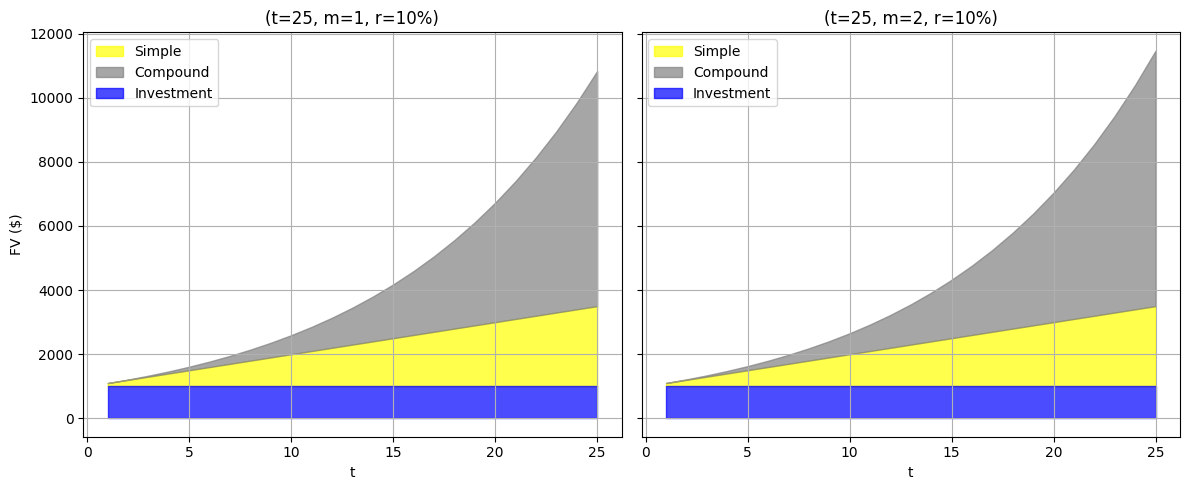

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import base64
import io
from IPython.display import display, HTML

# Parameters
PV = 1000  # Present Value in dollars
t = 25     # Time period in years
r = 0.10   # Interest rate (10%)
m_values = [1, 2]  # Compounding frequencies (annual and semi-annual)

# Time periods for plotting (from 1 to 25 years)
time_periods = np.arange(1, t + 1)

# Function to calculate simple interest FV
def simple_interest_fv(PV, r, t):
    return PV * (1 + r * t)

# Function to calculate compound interest FV
def compound_interest_fv(PV, r, t, m):
    return PV * (1 + r / m) ** (m * t)

# Calculate FV for investment (constant)
investment = np.full_like(time_periods, PV, dtype=float)

# Calculate FV for simple and compound interest
simple_fv = simple_interest_fv(PV, r, time_periods)
compound_fv_m1 = compound_interest_fv(PV, r, time_periods, m=1)  # m=1
compound_fv_m2 = compound_interest_fv(PV, r, time_periods, m=2)  # m=2

# Final FV values for the tables (at t=25)
final_simple_fv = simple_interest_fv(PV, r, t)
final_compound_fv_m1 = compound_interest_fv(PV, r, t, m=1)
final_compound_fv_m2 = compound_interest_fv(PV, r, t, m=2)

# Create a single figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot 1: m=1 (Annual compounding)
ax1.fill_between(time_periods, investment, simple_fv, color='yellow', label='Simple', alpha=0.7)
ax1.fill_between(time_periods, simple_fv, compound_fv_m1, color='gray', label='Compound', alpha=0.7)
ax1.fill_between(time_periods, 0, investment, color='blue', label='Investment', alpha=0.7)
ax1.set_title(f"(t={t}, m=1, r={int(r*100)}%)")
ax1.set_xlabel("t")
ax1.set_ylabel("FV ($)")
ax1.legend(loc="upper left")
ax1.grid(True)

# Plot 2: m=2 (Semi-annual compounding)
ax2.fill_between(time_periods, investment, simple_fv, color='yellow', label='Simple', alpha=0.7)
ax2.fill_between(time_periods, simple_fv, compound_fv_m2, color='gray', label='Compound', alpha=0.7)
ax2.fill_between(time_periods, 0, investment, color='blue', label='Investment', alpha=0.7)
ax2.set_title(f"(t={t}, m=2, r={int(r*100)}%)")
ax2.set_xlabel("t")
ax2.legend(loc="upper left")
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a buffer and close it to prevent duplicate rendering
buf = io.BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
buf.seek(0)
image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
plt.close(fig)  # Explicitly close the figure to avoid inline rendering
buf.close()

# Create image HTML
image_html = f'<img src="data:image/png;base64,{image_base64}" style="width: 100%;"/>'

# Create summary tables
table_data_m1 = {
    "PV": [f"{PV:.2f}"],
    "t": [t],
    "m": [1],
    "r": [f"{int(r*100)}%"],
    "FV": [f"{final_compound_fv_m1:.2f}"]
}
table_data_m2 = {
    "PV": [f"{PV:.2f}"],
    "t": [t],
    "m": [2],
    "r": [f"{int(r*100)}%"],
    "FV": [f"{final_compound_fv_m2:.2f}"]
}

df_m1 = pd.DataFrame(table_data_m1)
df_m2 = pd.DataFrame(table_data_m2)

table_html_m1 = df_m1.to_html(index=False, float_format=lambda x: f"{x:.2f}")
table_html_m2 = df_m2.to_html(index=False, float_format=lambda x: f"{x:.2f}")

# Combine image and tables in HTML
html_content = f"""
<div style="display: flex; justify-content: space-between; align-items: flex-start; width: 100%;">
    <div style="flex: 1; text-align: center;">
        <div>{image_html}</div>
        <div style="display: flex; justify-content: space-around;">
            <div style="flex: 1; margin-right: 10px;">{table_html_m1}</div>
            <div style="flex: 1;">{table_html_m2}</div>
        </div>
    </div>
</div>
"""

# Display the combined content
display(HTML(html_content))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import base64
import io
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from IPython.display import Javascript

# Define the function to calculate simple interest FV
def simple_interest_fv(PV, r, t):
    return PV * (1 + r * t)

# Define the function to calculate compound interest FV
def compound_interest_fv(PV, r, t, m):
    return PV * (1 + r / m) ** (m * t)

# Function to generate and display the output
def generate_output(PV, t, r, m1, m2, output_widget):
    with output_widget:
        try:
            # Clear the output area for the plots and tables
            clear_output(wait=True)

            # Time periods for plotting
            time_periods = np.arange(1, t + 1)

            # Calculate FV for investment (constant)
            investment = np.full_like(time_periods, PV, dtype=float)

            # Calculate FV for simple and compound interest
            simple_fv = simple_interest_fv(PV, r, time_periods)
            compound_fv_m1 = compound_interest_fv(PV, r, time_periods, m1)
            compound_fv_m2 = compound_interest_fv(PV, r, time_periods, m2)

            # Final FV values for the tables (at t)
            final_compound_fv_m1 = compound_interest_fv(PV, r, t, m1)
            final_compound_fv_m2 = compound_interest_fv(PV, r, t, m2)

            # Create a single figure with two subplots side by side
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

            # Plot 1: m=m1
            ax1.fill_between(time_periods, investment, simple_fv, color='yellow', label='Simple', alpha=0.7)
            ax1.fill_between(time_periods, simple_fv, compound_fv_m1, color='gray', label='Compound', alpha=0.7)
            ax1.fill_between(time_periods, 0, investment, color='blue', label='Investment', alpha=0.7)
            ax1.set_title(f"(t={t}, m={m1}, r={int(r*100)}%)")
            ax1.set_xlabel("t")
            ax1.set_ylabel("FV ($)")
            ax1.legend(loc="upper left")
            ax1.grid(True)

            # Plot 2: m=m2
            ax2.fill_between(time_periods, investment, simple_fv, color='yellow', label='Simple', alpha=0.7)
            ax2.fill_between(time_periods, simple_fv, compound_fv_m2, color='gray', label='Compound', alpha=0.7)
            ax2.fill_between(time_periods, 0, investment, color='blue', label='Investment', alpha=0.7)
            ax2.set_title(f"(t={t}, m={m2}, r={int(r*100)}%)")
            ax2.set_xlabel("t")
            ax2.legend(loc="upper left")
            ax2.grid(True)

            # Adjust layout to prevent overlap
            plt.tight_layout()

            # Save the figure to a buffer and close it
            buf = io.BytesIO()
            plt.savefig(buf, format='png', bbox_inches='tight')
            buf.seek(0)
            image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
            plt.close(fig)
            buf.close()

            # Create image HTML
            image_html = f'<img src="data:image/png;base64,{image_base64}" style="width: 90%;"/>'

            # Create summary tables
            table_data_m1 = {
                "PV": [f"{PV:.2f}"],
                "t": [t],
                "m": [m1],
                "r": [f"{int(r*100)}%"],
                "FV": [f"{final_compound_fv_m1:.2f}"]
            }
            table_data_m2 = {
                "PV": [f"{PV:.2f}"],
                "t": [t],
                "m": [m2],
                "r": [f"{int(r*100)}%"],
                "FV": [f"{final_compound_fv_m2:.2f}"]
            }

            df_m1 = pd.DataFrame(table_data_m1)
            df_m2 = pd.DataFrame(table_data_m2)

            table_html_m1 = df_m1.to_html(index=False, float_format=lambda x: f"{x:.2f}")
            table_html_m2 = df_m2.to_html(index=False, float_format=lambda x: f"{x:.2f}")

            # Combine image and tables in HTML
            html_content = f"""
            <div style="display: flex; justify-content: space-between; align-items: flex-start; width: 100%;">
                <div style="flex: 1; text-align: center;">
                    <div>{image_html}</div>
                    <div style="display: flex; justify-content: space-around;">
                        <div style="flex: 1; margin-right: 10px;">{table_html_m1}</div>
                        <div style="flex: 1;">{table_html_m2}</div>
                    </div>
                </div>
            </div>
            """

            # Display new content in the output widget
            display(HTML(html_content))

        except Exception as e:
            clear_output(wait=True)
            display(HTML(f"<p style='color: red;'>Error: {str(e)}</p>"))

# Create interactive widgets
PV_widget = widgets.FloatText(value=1000, description='PV ($):', step=100)
t_widget = widgets.IntText(value=25, description='t (years):', min=1, max=50)
r_widget = widgets.FloatText(value=10, description='r (%):', step=0.1)
m1_widget = widgets.IntText(value=1, description='m1:', min=1, max=12)
m2_widget = widgets.IntText(value=2, description='m2:', min=1, max=12)

# Create regenerate button
button = widgets.Button(description="Regenerate")

# Create an output widget for the plots and tables
output_widget = widgets.Output()

# Define button click event
def on_button_clicked(b):
    PV = PV_widget.value
    t = t_widget.value
    r = r_widget.value / 100  # Convert percentage to decimal
    m1 = m1_widget.value
    m2 = m2_widget.value
    generate_output(PV, t, r, m1, m2, output_widget)

button.on_click(on_button_clicked)

# Organize widgets in a box
widget_box = widgets.VBox([
    PV_widget,
    t_widget,
    r_widget,
    m1_widget,
    m2_widget,
    button
])

# Display the widgets and output separately
display(widget_box)
display(output_widget)

# Initial generation
generate_output(1000, 25, 0.10, 1, 2, output_widget)

Output()